# Analysis and Insights

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid')

## Upload Data

In [3]:
df = pd.read_pickle('../Datos/df.pickle')
df.head()

plant  month  day  hour  minute        sensor_id  irradiation  \
date                                                                       
2020-05-15    p1      5   15     0       0  HmiyD2TTLFNqkNe          0.0   
2020-05-15    p1      5   15     0       0  HmiyD2TTLFNqkNe          0.0   
2020-05-15    p1      5   15     0       0  HmiyD2TTLFNqkNe          0.0   
2020-05-15    p1      5   15     0       0  HmiyD2TTLFNqkNe          0.0   
2020-05-15    p1      5   15     0       0  HmiyD2TTLFNqkNe          0.0   

            t_ambient   t_module      inverter_id  kw_dc  kw_ac  efficiency  \
date                                                                          
2020-05-15  25.184316  22.857507  1BY6WEcLGh8j5v7    0.0    0.0         0.0   
2020-05-15  25.184316  22.857507  1IF53ai7Xc0U56Y    0.0    0.0         0.0   
2020-05-15  25.184316  22.857507  3PZuoBAID5Wc2HD    0.0    0.0         0.0   
2020-05-15  25.184316  22.857507  7JYdWkrLSPkdwr4    0.0    0.0         0.0   
2020-05-15  25.184316  22.857507  McdE0feGgRqW7Ca    0.0    0.0         0.0   

            kw_day   kw_total  
date                           
2020-05-15     0.0  6259559.0  
2020-05-15     0.0  6183645.0  
2020-05-15     0.0  6987759.0  
2020-05-15     0.0  7602960.0  
2020-05-15     0.0  7158964.0

In [4]:
df_day = pd.read_pickle('../Datos/df_day.pickle')
df_day.head()

plant      inverter_id  irradiation_min  irradiation_mean  \
date                                                                   
2020-05-15    p1  1BY6WEcLGh8j5v7              0.0          0.204699   
2020-05-16    p1  1BY6WEcLGh8j5v7              0.0          0.211951   
2020-05-17    p1  1BY6WEcLGh8j5v7              0.0          0.238869   
2020-05-18    p1  1BY6WEcLGh8j5v7              0.0          0.159026   
2020-05-19    p1  1BY6WEcLGh8j5v7              0.0          0.194031   

            irradiation_max  t_ambient_min  t_ambient_mean  t_ambient_max  \
date                                                                        
2020-05-15         0.893661      22.037482       27.430823      34.430943   
2020-05-16         0.812241      21.496287       26.780538      32.524149   
2020-05-17         0.997904      21.209418       26.686727      35.252486   
2020-05-18         0.971481      20.961525       23.850938      28.367100   
2020-05-19         0.835832      22.388784       25.338021      30.368632   

            t_module_min  t_module_mean  ...      kw_dc_sum  kw_ac_min  \
date                                     ...                             
2020-05-15     20.290726      32.582964  ...  235340.696429        0.0   
2020-05-16     19.592692      31.858851  ...  256629.875001        0.0   
2020-05-17     20.377121      32.740435  ...  288039.821438        0.0   
2020-05-18     19.477531      27.814344  ...  204030.303569        0.0   
2020-05-19     20.062144      29.725163  ...  232277.267856        0.0   

            kw_ac_mean    kw_ac_max     kw_ac_sum  efficiency_min  \
date                                                                
2020-05-15  247.812372  1039.350000  23046.550595             0.0   
2020-05-16  285.505580  1095.285714  25124.491072             0.0   
2020-05-17  293.467187  1114.814286  28172.850000             0.0   
2020-05-18  208.026116  1193.628571  19970.507143             0.0   
2020-05-19  244.528783  1059.800000  22741.176786             0.0   

            efficiency_mean  efficiency_max  kw_day_max  kw_total_max  
date                                                                   
2020-05-15         5.258029        9.823548      5754.0     6265313.0  
2020-05-16         5.555110        9.828622      6292.0     6271605.0  
2020-05-17         4.987913        9.824094      7045.0     6278650.0  
2020-05-18         4.989864        9.830864      4998.0     6283648.0  
2020-05-19         4.628925        9.831315      6449.0     6290097.0  

[5 rows x 24 columns]

## Analysis

The first lever is solar energy reception.

We have three KPIs to measure this lever: incoming irradiation, ambient temperature, and module temperature.
These KPIs are measured with a single sensor per plant, so the data is the same for all inverters.

Since the inverter does not matter and we only need these three variables, we are going to create a smaller dataset with only one inverter from each plant to work on.

In [5]:
reception = df.loc[(df.inverter_id == '1BY6WEcLGh8j5v7') | (df.inverter_id == 'q49J1IKaHRwDQnt'), 'plant':'t_module']
reception

plant  month  day  hour  minute        sensor_id  \
date                                                                   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00    p1      5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00    p1      5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:45:00    p1      5   15     0      45  HmiyD2TTLFNqkNe   
2020-05-15 01:00:00    p1      5   15     1       0  HmiyD2TTLFNqkNe   
...                   ...    ...  ...   ...     ...              ...   
2020-06-17 22:45:00    p2      6   17    22      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:00:00    p2      6   17    23       0  iq8k7ZNt4Mwm3w0   
2020-06-17 23:15:00    p2      6   17    23      15  iq8k7ZNt4Mwm3w0   
2020-06-17 23:30:00    p2      6   17    23      30  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   

                     irradiation  t_ambient   t_module  
date                                                    
2020-05-15 00:00:00          0.0  25.184316  22.857507  
2020-05-15 00:15:00          0.0  25.084589  22.761668  
2020-05-15 00:30:00          0.0  24.935753  22.592306  
2020-05-15 00:45:00          0.0  24.846130  22.360852  
2020-05-15 01:00:00          0.0  24.621525  22.165423  
...                          ...        ...        ...  
2020-06-17 22:45:00          0.0  23.511703  22.856201  
2020-06-17 23:00:00          0.0  23.482282  22.744190  
2020-06-17 23:15:00          0.0  23.354743  22.492245  
2020-06-17 23:30:00          0.0  23.291048  22.373909  
2020-06-17 23:45:00          0.0  23.202871  22.535908  

[6413 rows x 9 columns]

### The two plants receive the same energy?

In [6]:
temp = reception.groupby('plant').agg({'irradiation':'sum','t_ambient':'mean','t_module':'mean'})
temp

irradiation  t_ambient   t_module
plant                                   
p1      726.396941  25.560769  31.182856
p2      758.489817  28.069400  32.772408

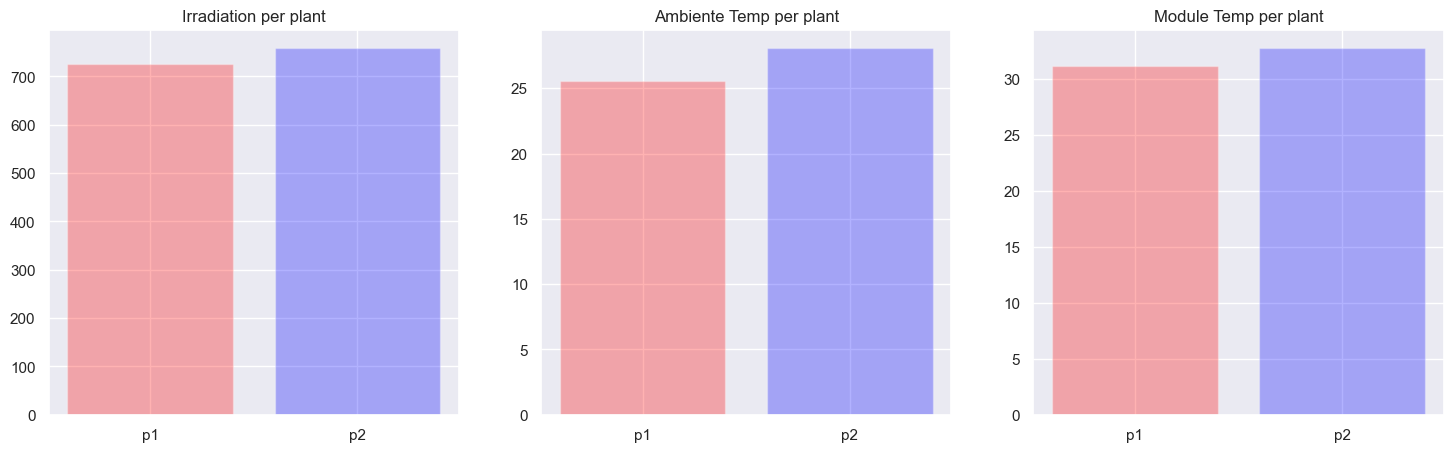

In [7]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,5))

ax[0].bar(temp.index, temp.irradiation, color = ['red','blue'], alpha = 0.3)
ax[1].bar(temp.index, temp.t_ambient, color = ['red','blue'], alpha = 0.3)
ax[2].bar(temp.index, temp.t_module, color = ['red','blue'], alpha = 0.3)
ax[0].set_title('Irradiation per plant')
ax[1].set_title('Ambiente Temp per plant')
ax[2].set_title('Module Temp per plant');

**Insight:** The plant 2 receives more energy than plant 1.

### How are these variables related?

In [8]:
temp = reception.loc[:,['plant','irradiation','t_ambient','t_module']]
temp

plant  irradiation  t_ambient   t_module
date                                                        
2020-05-15 00:00:00    p1          0.0  25.184316  22.857507
2020-05-15 00:15:00    p1          0.0  25.084589  22.761668
2020-05-15 00:30:00    p1          0.0  24.935753  22.592306
2020-05-15 00:45:00    p1          0.0  24.846130  22.360852
2020-05-15 01:00:00    p1          0.0  24.621525  22.165423
...                   ...          ...        ...        ...
2020-06-17 22:45:00    p2          0.0  23.511703  22.856201
2020-06-17 23:00:00    p2          0.0  23.482282  22.744190
2020-06-17 23:15:00    p2          0.0  23.354743  22.492245
2020-06-17 23:30:00    p2          0.0  23.291048  22.373909
2020-06-17 23:45:00    p2          0.0  23.202871  22.535908

[6413 rows x 4 columns]

In [9]:
temp.select_dtypes(include='number').corr()

irradiation  t_ambient  t_module
irradiation     1.000000   0.654588  0.950711
t_ambient       0.654588   1.000000  0.818025
t_module        0.950711   0.818025  1.000000

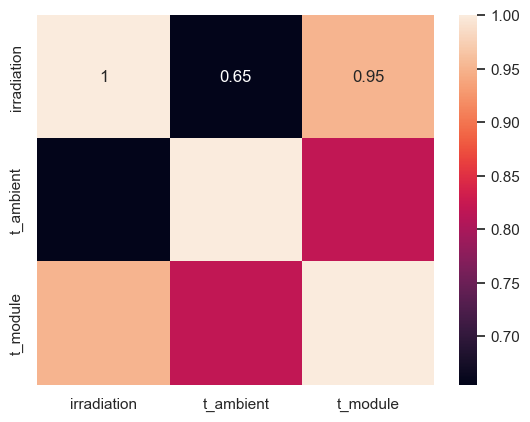

In [10]:
sns.heatmap(temp.select_dtypes(include='number').corr(), annot=True);

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping wi

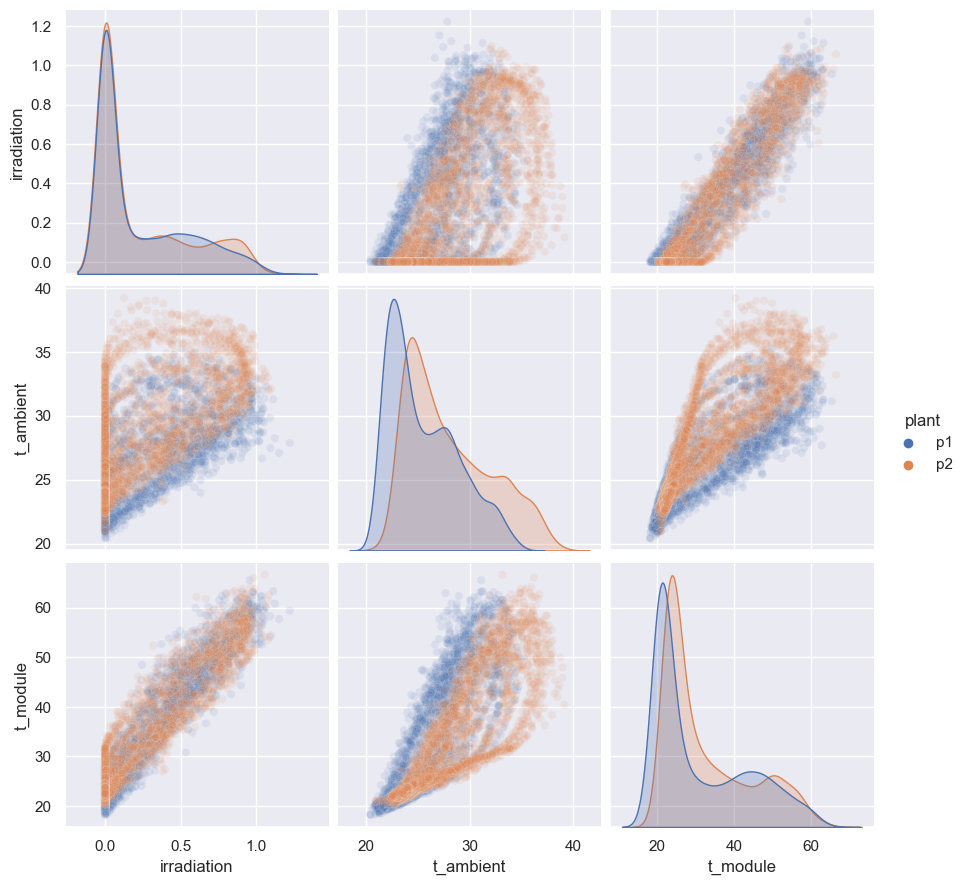

In [11]:
sns.pairplot(temp.reset_index(), hue = 'plant', height=3, plot_kws={'alpha': 0.1});

**Insight:** 
* Irradiation correlates strongly with module temperature. But not so much with ambient temperature
* Therefore, an initial way to identify defective or dirty modules is to locate those that produce little when irradiation is high

### How are radiation and temperature distributed throughout the day?

In [12]:
temp = pd.crosstab(reception.hour,reception.plant,values = reception.irradiation,aggfunc='mean')
temp

plant        p1            p2
hour                         
0      0.000000  2.001904e-06
1      0.000000  7.809492e-07
2      0.000000  8.467984e-07
3      0.000000  2.526097e-06
4      0.000000  4.110394e-06
5      0.000121  2.614531e-04
6      0.041958  4.226912e-02
7      0.193634  1.903292e-01
8      0.372675  3.851057e-01
9      0.527595  5.747512e-01
10     0.644846  6.933183e-01
11     0.732041  7.638551e-01
12     0.742306  7.867638e-01
13     0.692890  6.865604e-01
14     0.583652  5.961916e-01
15     0.457892  4.367718e-01
16     0.288121  2.832315e-01
17     0.126313  1.246786e-01
18     0.016653  2.230285e-02
19     0.000002  5.430673e-05
20     0.000000  9.565429e-05
21     0.000000  3.118689e-06
22     0.000000  3.585728e-05
23     0.000000  6.858613e-06

In [13]:
pd.options.display.float_format = '{:15.2f}'.format
temp

plant              p1              p2
hour                                 
0                0.00            0.00
1                0.00            0.00
2                0.00            0.00
3                0.00            0.00
4                0.00            0.00
5                0.00            0.00
6                0.04            0.04
7                0.19            0.19
8                0.37            0.39
9                0.53            0.57
10               0.64            0.69
11               0.73            0.76
12               0.74            0.79
13               0.69            0.69
14               0.58            0.60
15               0.46            0.44
16               0.29            0.28
17               0.13            0.12
18               0.02            0.02
19               0.00            0.00
20               0.00            0.00
21               0.00            0.00
22               0.00            0.00
23               0.00            0.00

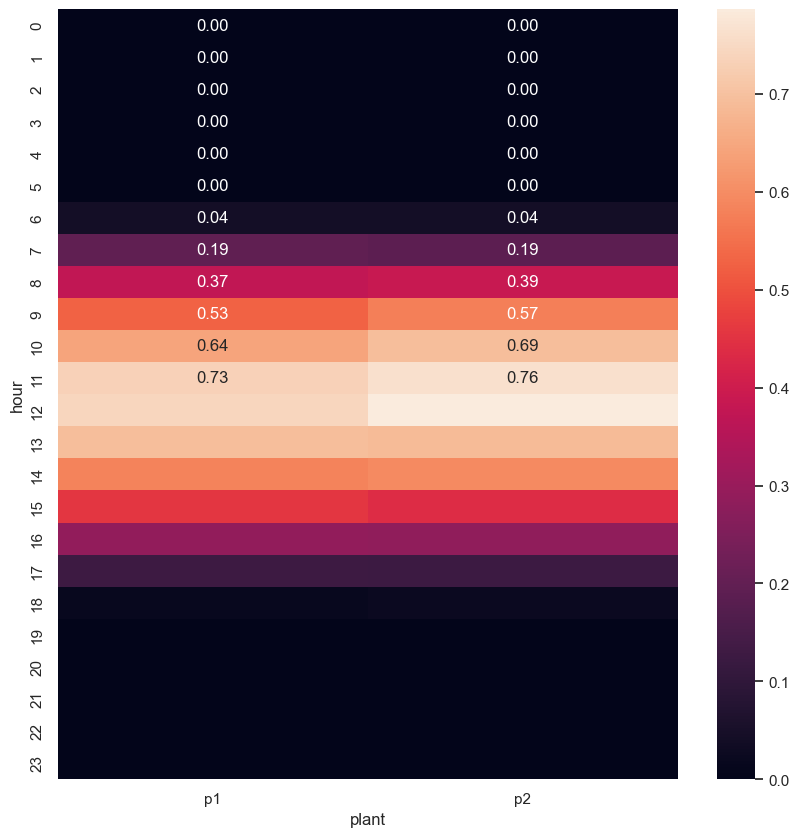

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f");

In [15]:
temp = pd.crosstab(reception.hour,reception.plant,values = reception.t_ambient,aggfunc='mean')
temp

plant              p1              p2
hour                                 
0               22.80           25.20
1               22.63           24.82
2               22.46           24.48
3               22.32           24.27
4               22.17           24.07
5               22.06           23.91
6               22.20           24.19
7               23.34           25.48
8               24.92           27.05
9               26.48           28.61
10              27.65           30.17
11              28.80           31.43
12              29.62           32.55
13              30.10           33.01
14              30.29           33.16
15              29.99           32.81
16              29.38           32.44
17              28.29           31.59
18              26.66           30.00
19              25.36           28.61
20              24.50           27.63
21              23.87           26.75
22              23.26           26.06
23              22.92           25.46

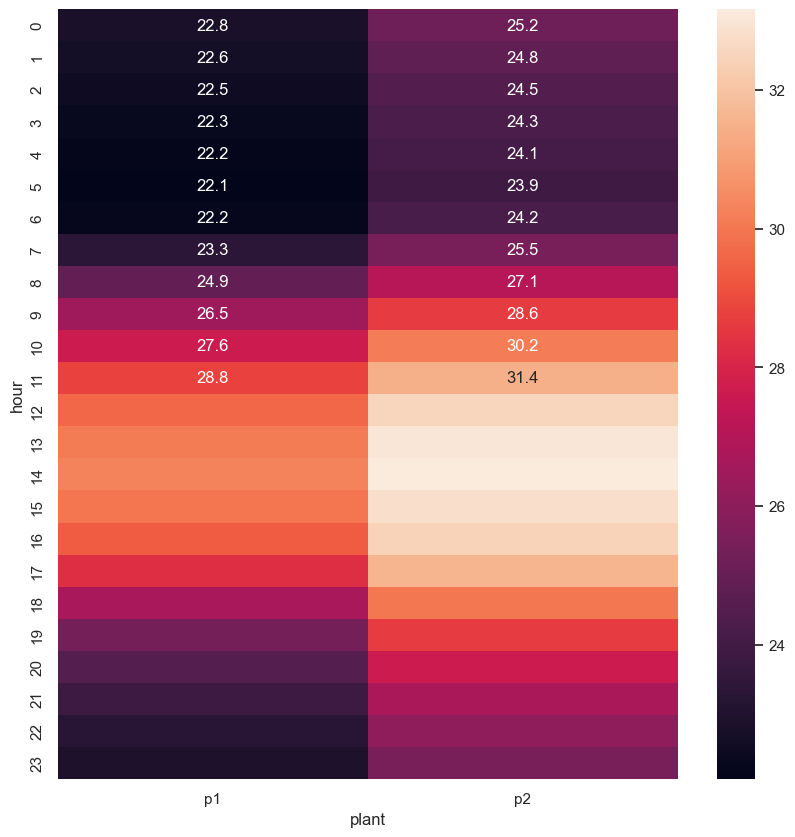

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".1f");

**Insight:** 

* Both plants have similar patterns. We could assume that they are located in geographical areas that are not very far apart.
* There is irradiation (and therefore, in principle, the plants should produce) between 7 a.m. and 5 p.m.
* Maximum irradiation occurs between 11 a.m. and 12 p.m.
* The maximum ambient temperature occurs between 2 p.m. and 4 p.m.

### Are both plants equally capable of generating DC from irradiation?

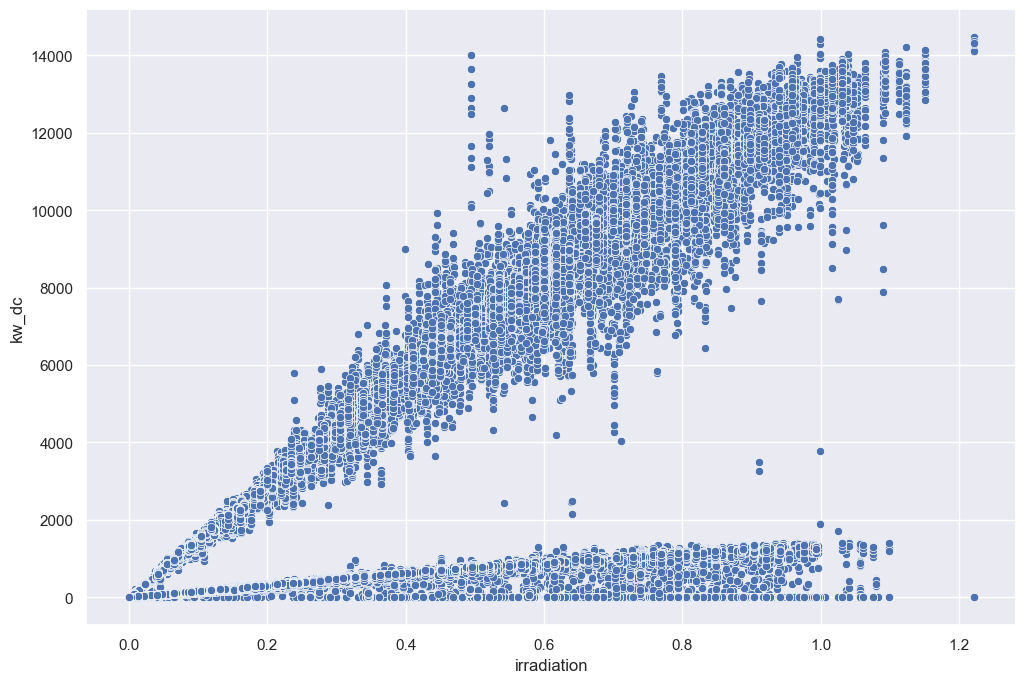

In [17]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df.irradiation, y = df.kw_dc);

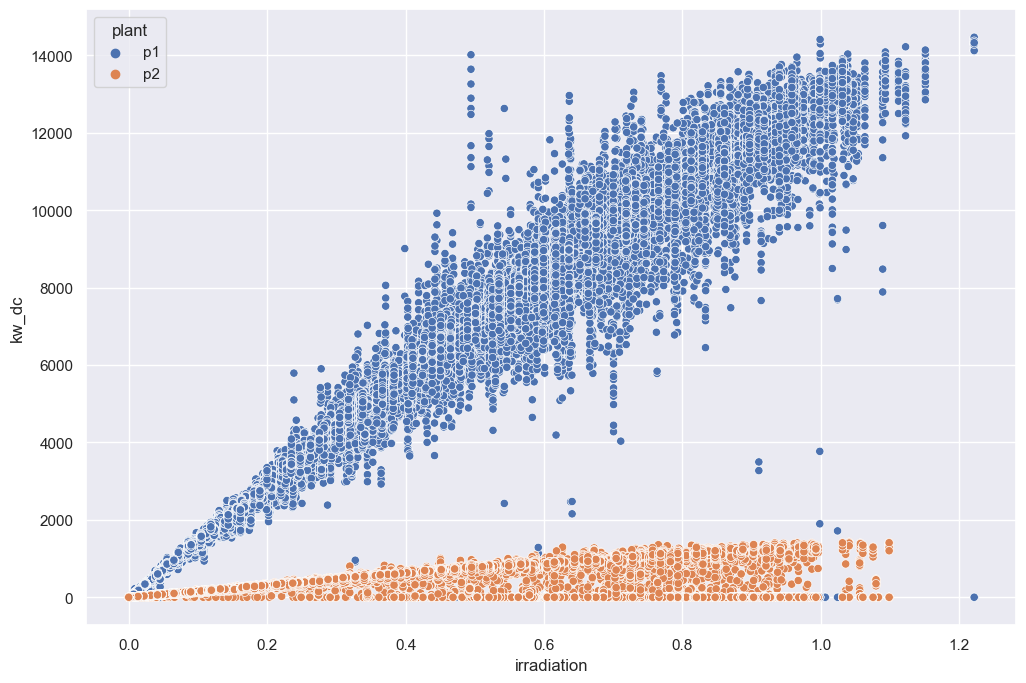

In [18]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df.irradiation, y = df.kw_dc, hue = 'plant');

Plant number 2 produces significantly fewer kW at the same irradiation levels.

However, we had previously observed that the relationship between DC and AC in plant 1 was unusual.

We also noted that the DC and AC data did not match the kW_day data.

There is something unusual about the data.

Let us examine the relationship between irradiation and kW_day to see if it provides any insight.

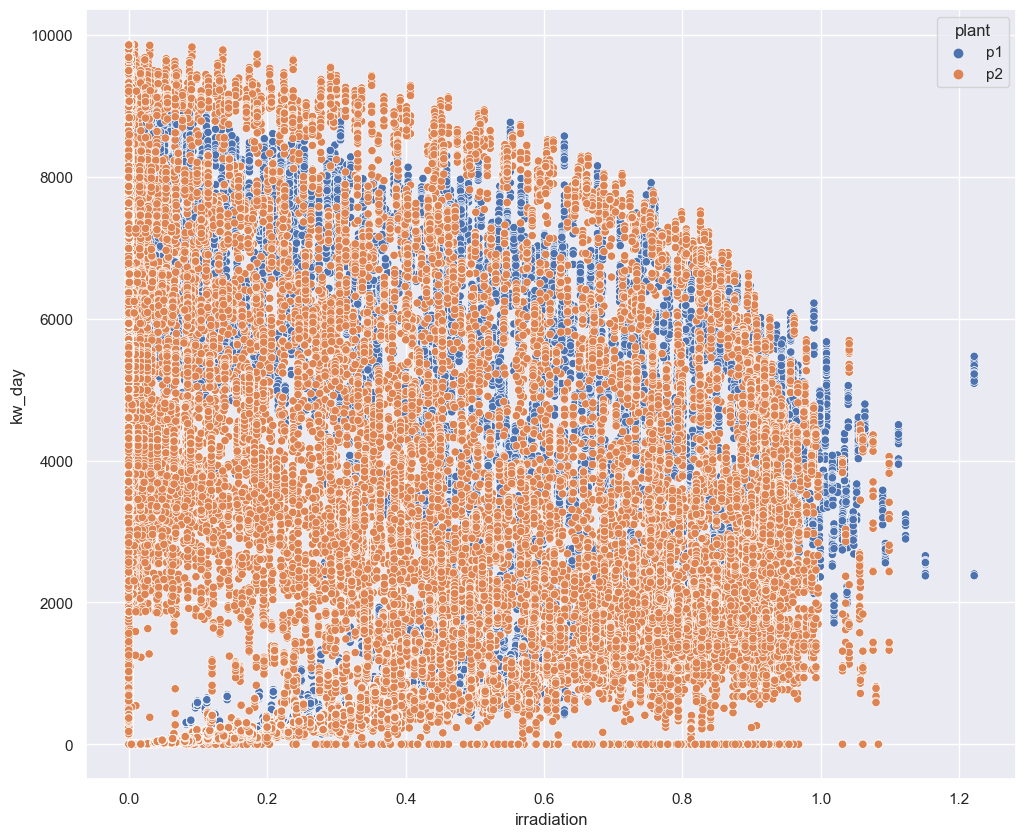

In [19]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = df.irradiation, y = df.kw_day, hue = 'plant');

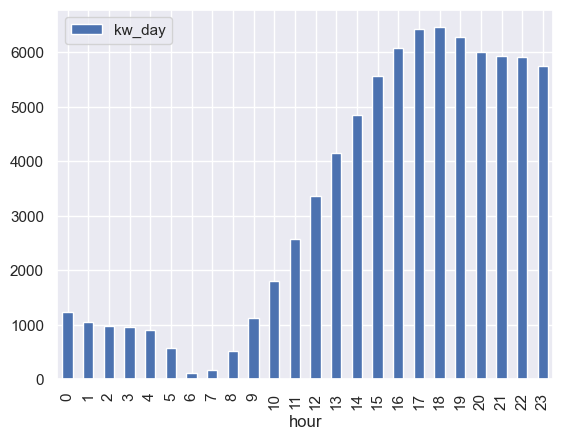

In [20]:
df.groupby('hour')[['kw_day']].mean().plot.bar();

There is generation between midnight and 6 a.m. And then, starting at 6 p.m., it begins to decline, which should not happen if it is an accumulated value.

Conclusion:

We do not trust these accumulated variables such as kw_day and kw_total.

But the truth is that we do not trust the others very much either.

In a real situation, I would halt the project until I could see what was happening with the data.

But in order to continue, we will assume that the dc and ac data are correct.

**Insight:** Plant 2 generates much lower levels of DC even at similar levels of irradiation.

### Is generation constant throughout the days?

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

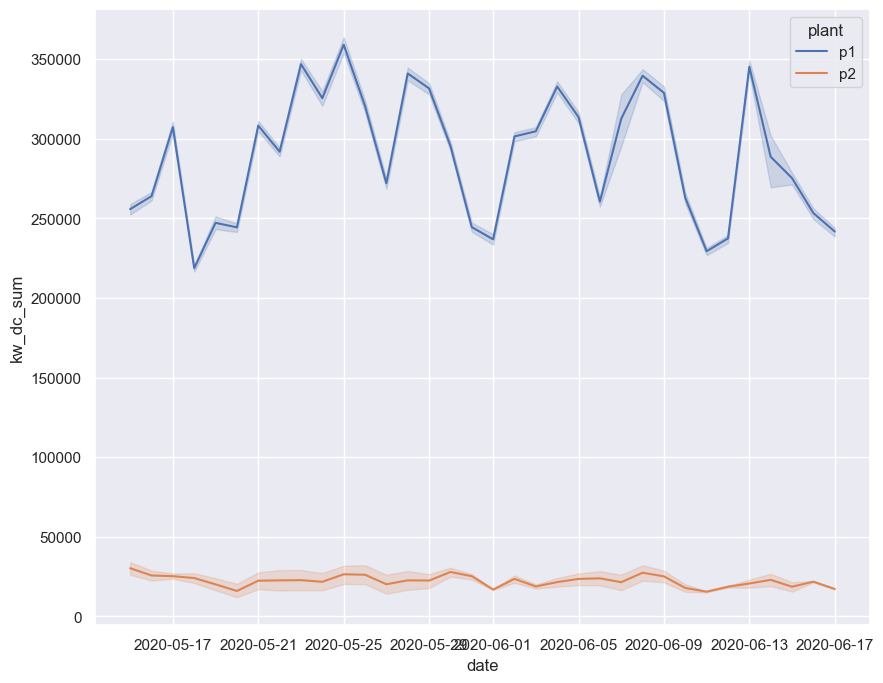

In [21]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_day.reset_index(), x = df_day.reset_index().date, y = 'kw_dc_sum', hue = 'plant');

In [22]:
df

plant  month  day  hour  minute        sensor_id  \
date                                                                   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
...                   ...    ...  ...   ...     ...              ...   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiation       t_ambient        t_module  \
date                                                                  
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   

                         inverter_id           kw_dc           kw_ac  \
date                                                                   
2020-05-15 00:00:00  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00  McdE0feGgRqW7Ca            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         efficiency          kw_day        kw_total  
date                                                                 
2020-05-15 00:00:00            0.00            0.00      6259559.00  
2020-05-15 00:00:00            0.00            0.00      6183645.00  
2020-05-15 00:00:00            0.00            0.00      6987759.00  
2020-05-15 00:00:00            0.00            0.00      7602960.00  
2020-05-15 00:00:00            0.00            0.00      7158964.00  
...                             ...             ...             ...  
2020-06-17 23:45:00            0.00         4157.00       520758.00  
2020-06-17 23:45:00            0.00         3931.00    121131356.00  
2020-06-17 23:45:00            0.00         4322.00      2427691.00  
2020-06-17 23:45:00            0.00         4218.00    106896394.00  
2020-06-17 23:45:00            0.00         4316.00    209335741.00  

[136472 rows x 15 columns]

In [23]:
df['year_month_day'] = df.index.date
df

plant  month  day  hour  minute        sensor_id  \
date                                                                   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00    p1      5   15     0       0  HmiyD2TTLFNqkNe   
...                   ...    ...  ...   ...     ...              ...   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00    p2      6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiation       t_ambient        t_module  \
date                                                                  
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   

                         inverter_id           kw_dc           kw_ac  \
date                                                                   
2020-05-15 00:00:00  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00  McdE0feGgRqW7Ca            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         efficiency          kw_day        kw_total  \
date                                                                  
2020-05-15 00:00:00            0.00            0.00      6259559.00   
2020-05-15 00:00:00            0.00            0.00      6183645.00   
2020-05-15 00:00:00            0.00            0.00      6987759.00   
2020-05-15 00:00:00            0.00            0.00      7602960.00   
2020-05-15 00:00:00            0.00            0.00      7158964.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00         4157.00       520758.00   
2020-06-17 23:45:00            0.00         3931.00    121131356.00   
2020-06-17 23:45:00            0.00         4322.00      2427691.00   
2020-06-17 23:45:00            0.00         4218.00    106896394.00   
2020-06-17 23:45:00            0.00         4316.00    209335741.00   

                    year_month_day  
date                                
2020-05-15 00:00:00     2020-05-15  
2020-05-15 00:00:00     2020-05-15  
2020-05-15 00:00:00     2020-05-15  
2020-05-15 00:00:00     2020-05-15  
2020-05-15 00:00:00     2020-05-15  
...                            ...  
20

In [24]:
dc_constant_p1 = df[df.plant == 'p1'].groupby(['plant','year_month_day','hour']).kw_dc.sum()
dc_constant_p1

plant  year_month_day  hour
p1     2020-05-15      0                 0.00
                       1                 0.00
                       2                 0.00
                       3                 0.00
                       4                 0.00
                                    ...      
       2020-06-17      19                0.00
                       20                0.00
                       21                0.00
                       22                0.00
                       23                0.00
Name: kw_dc, Length: 796, dtype: float64

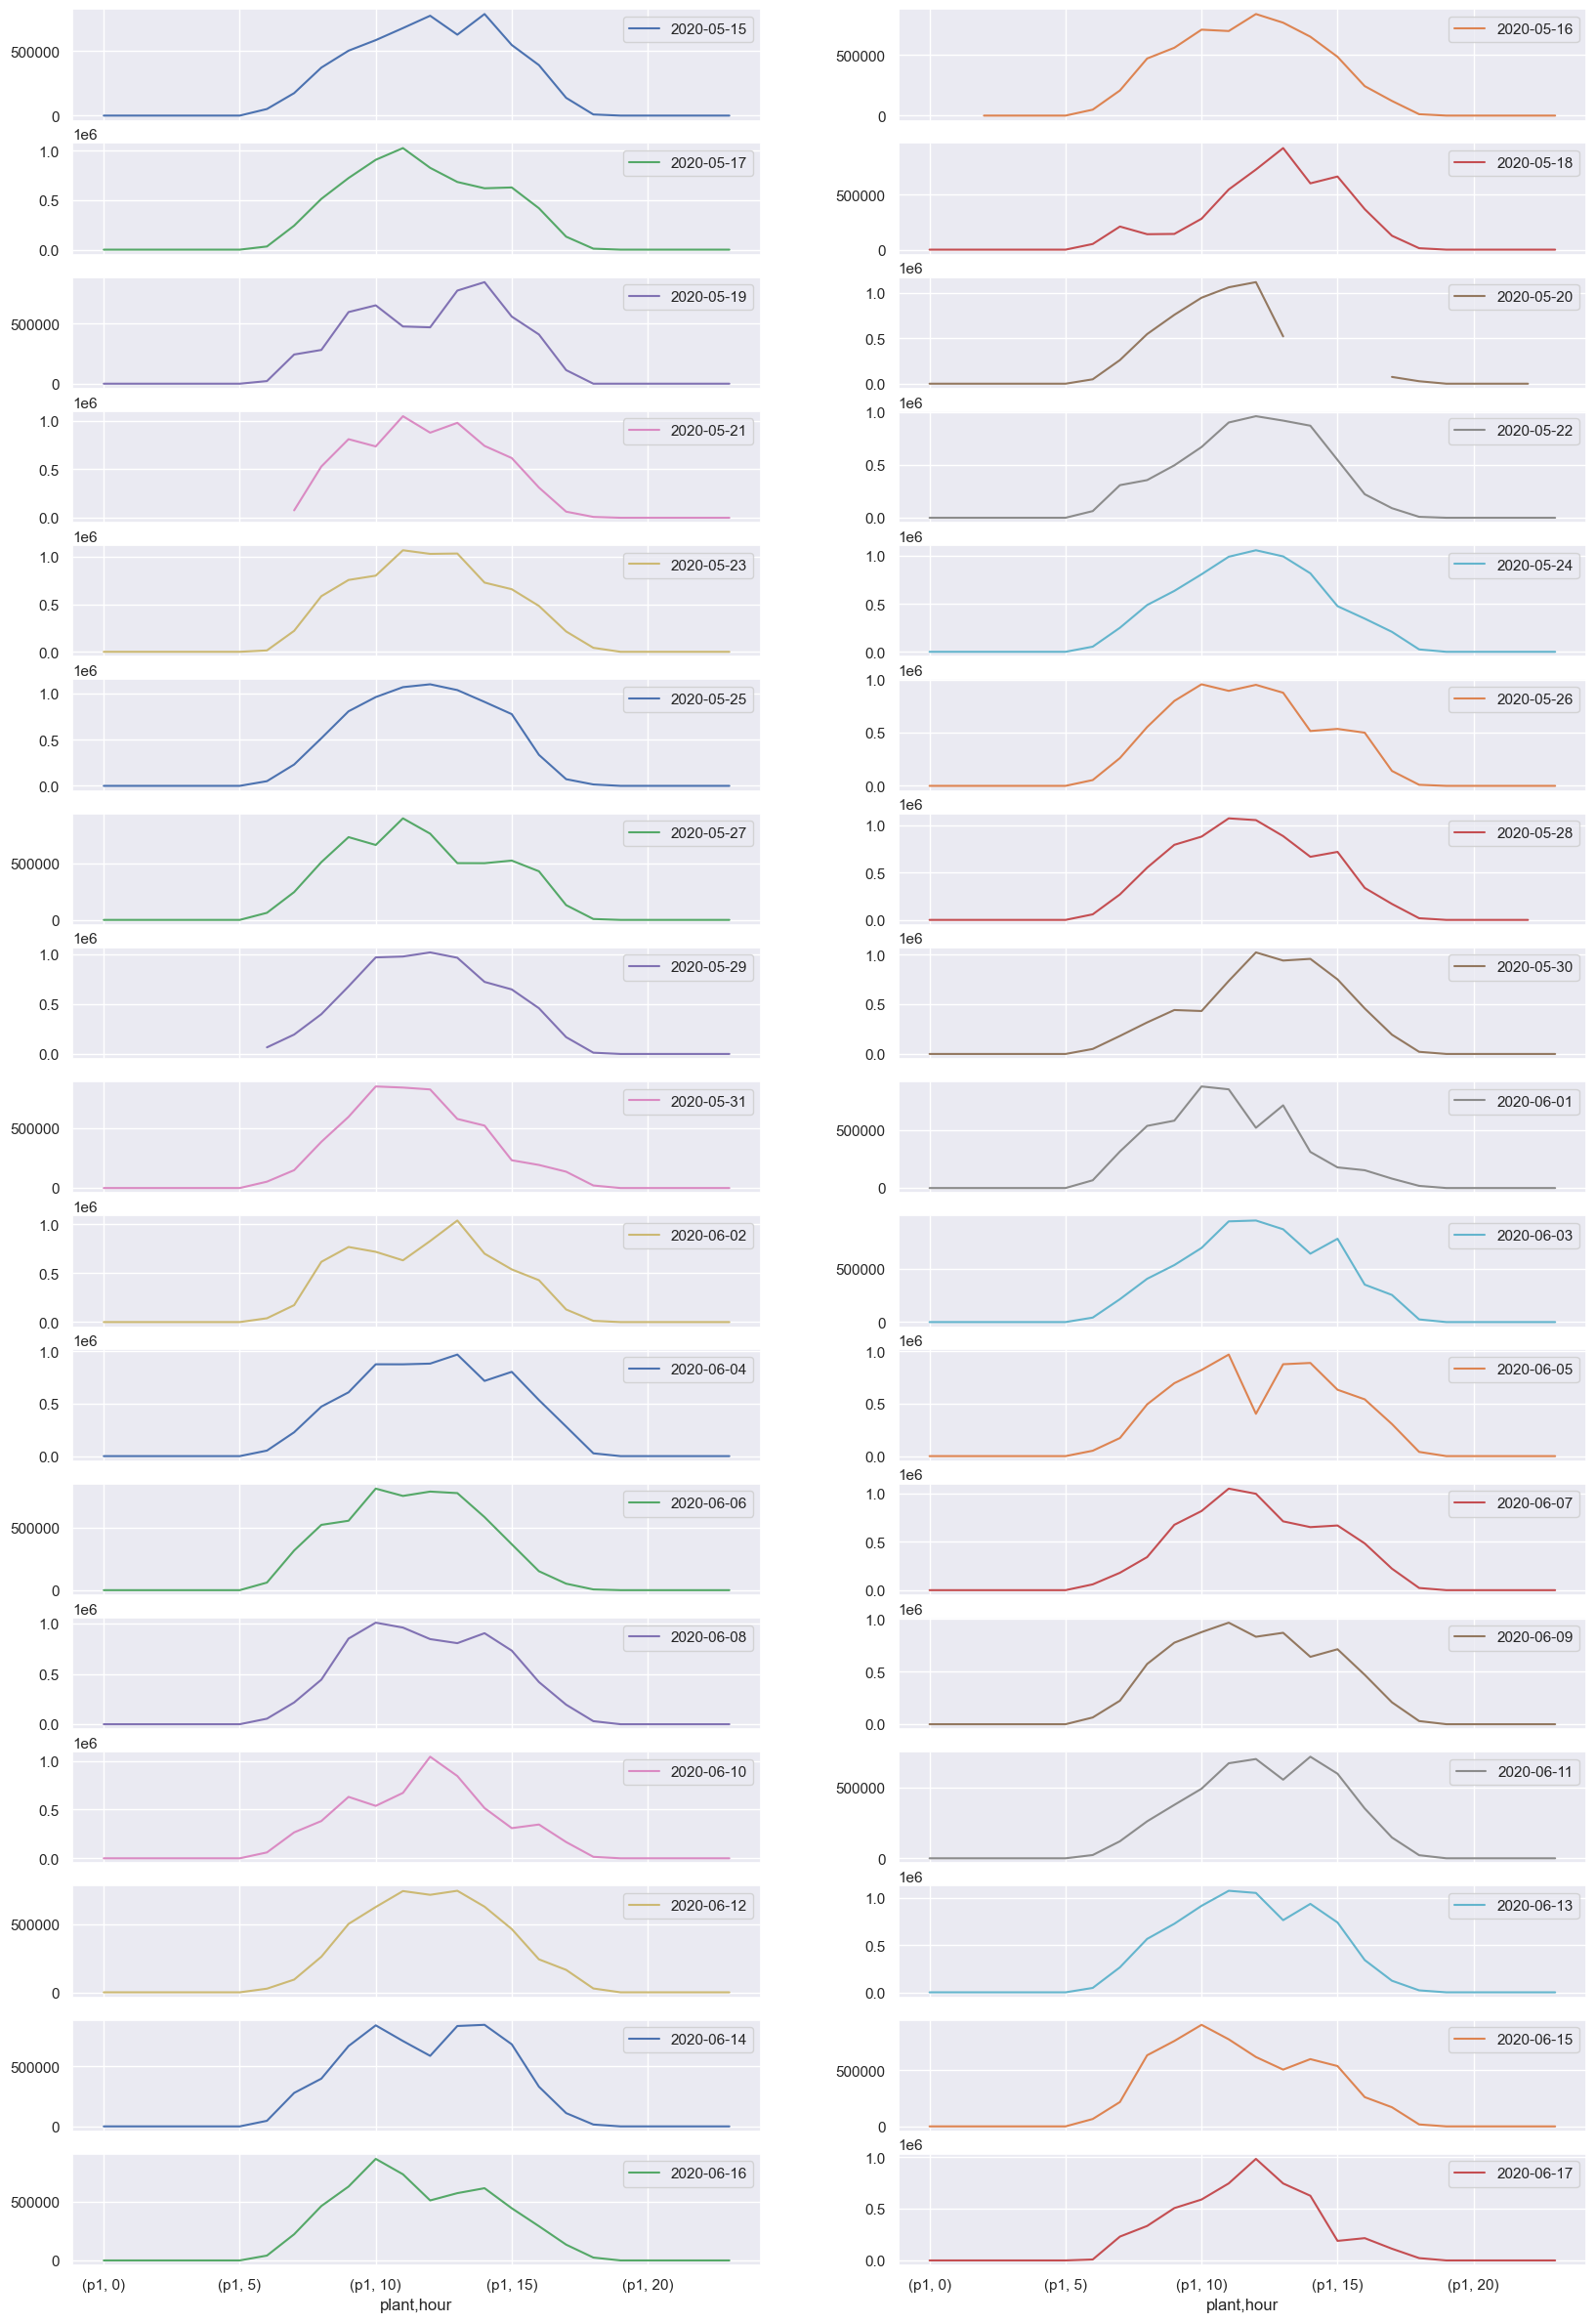

In [25]:
dc_constant_p1.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusions:

* On plant 1, similar patterns are maintained every day. With the exception of a pause on May 20 and a strange drop on June 5
* But none of them appear to be structural
* Therefore, although each day may have different production totals, the intraday patterns are similar and appear to be correct

In [26]:
dc_constant_p2 = df[df.plant == 'p2'].groupby(['plant','year_month_day','hour']).kw_dc.sum()
dc_constant_p2

plant  year_month_day  hour
p2     2020-05-15      0                 0.00
                       1                 0.00
                       2                 0.00
                       3                 0.00
                       4                 0.00
                                    ...      
       2020-06-17      19                0.00
                       20                0.00
                       21                0.00
                       22                0.00
                       23                0.00
Name: kw_dc, Length: 816, dtype: float64

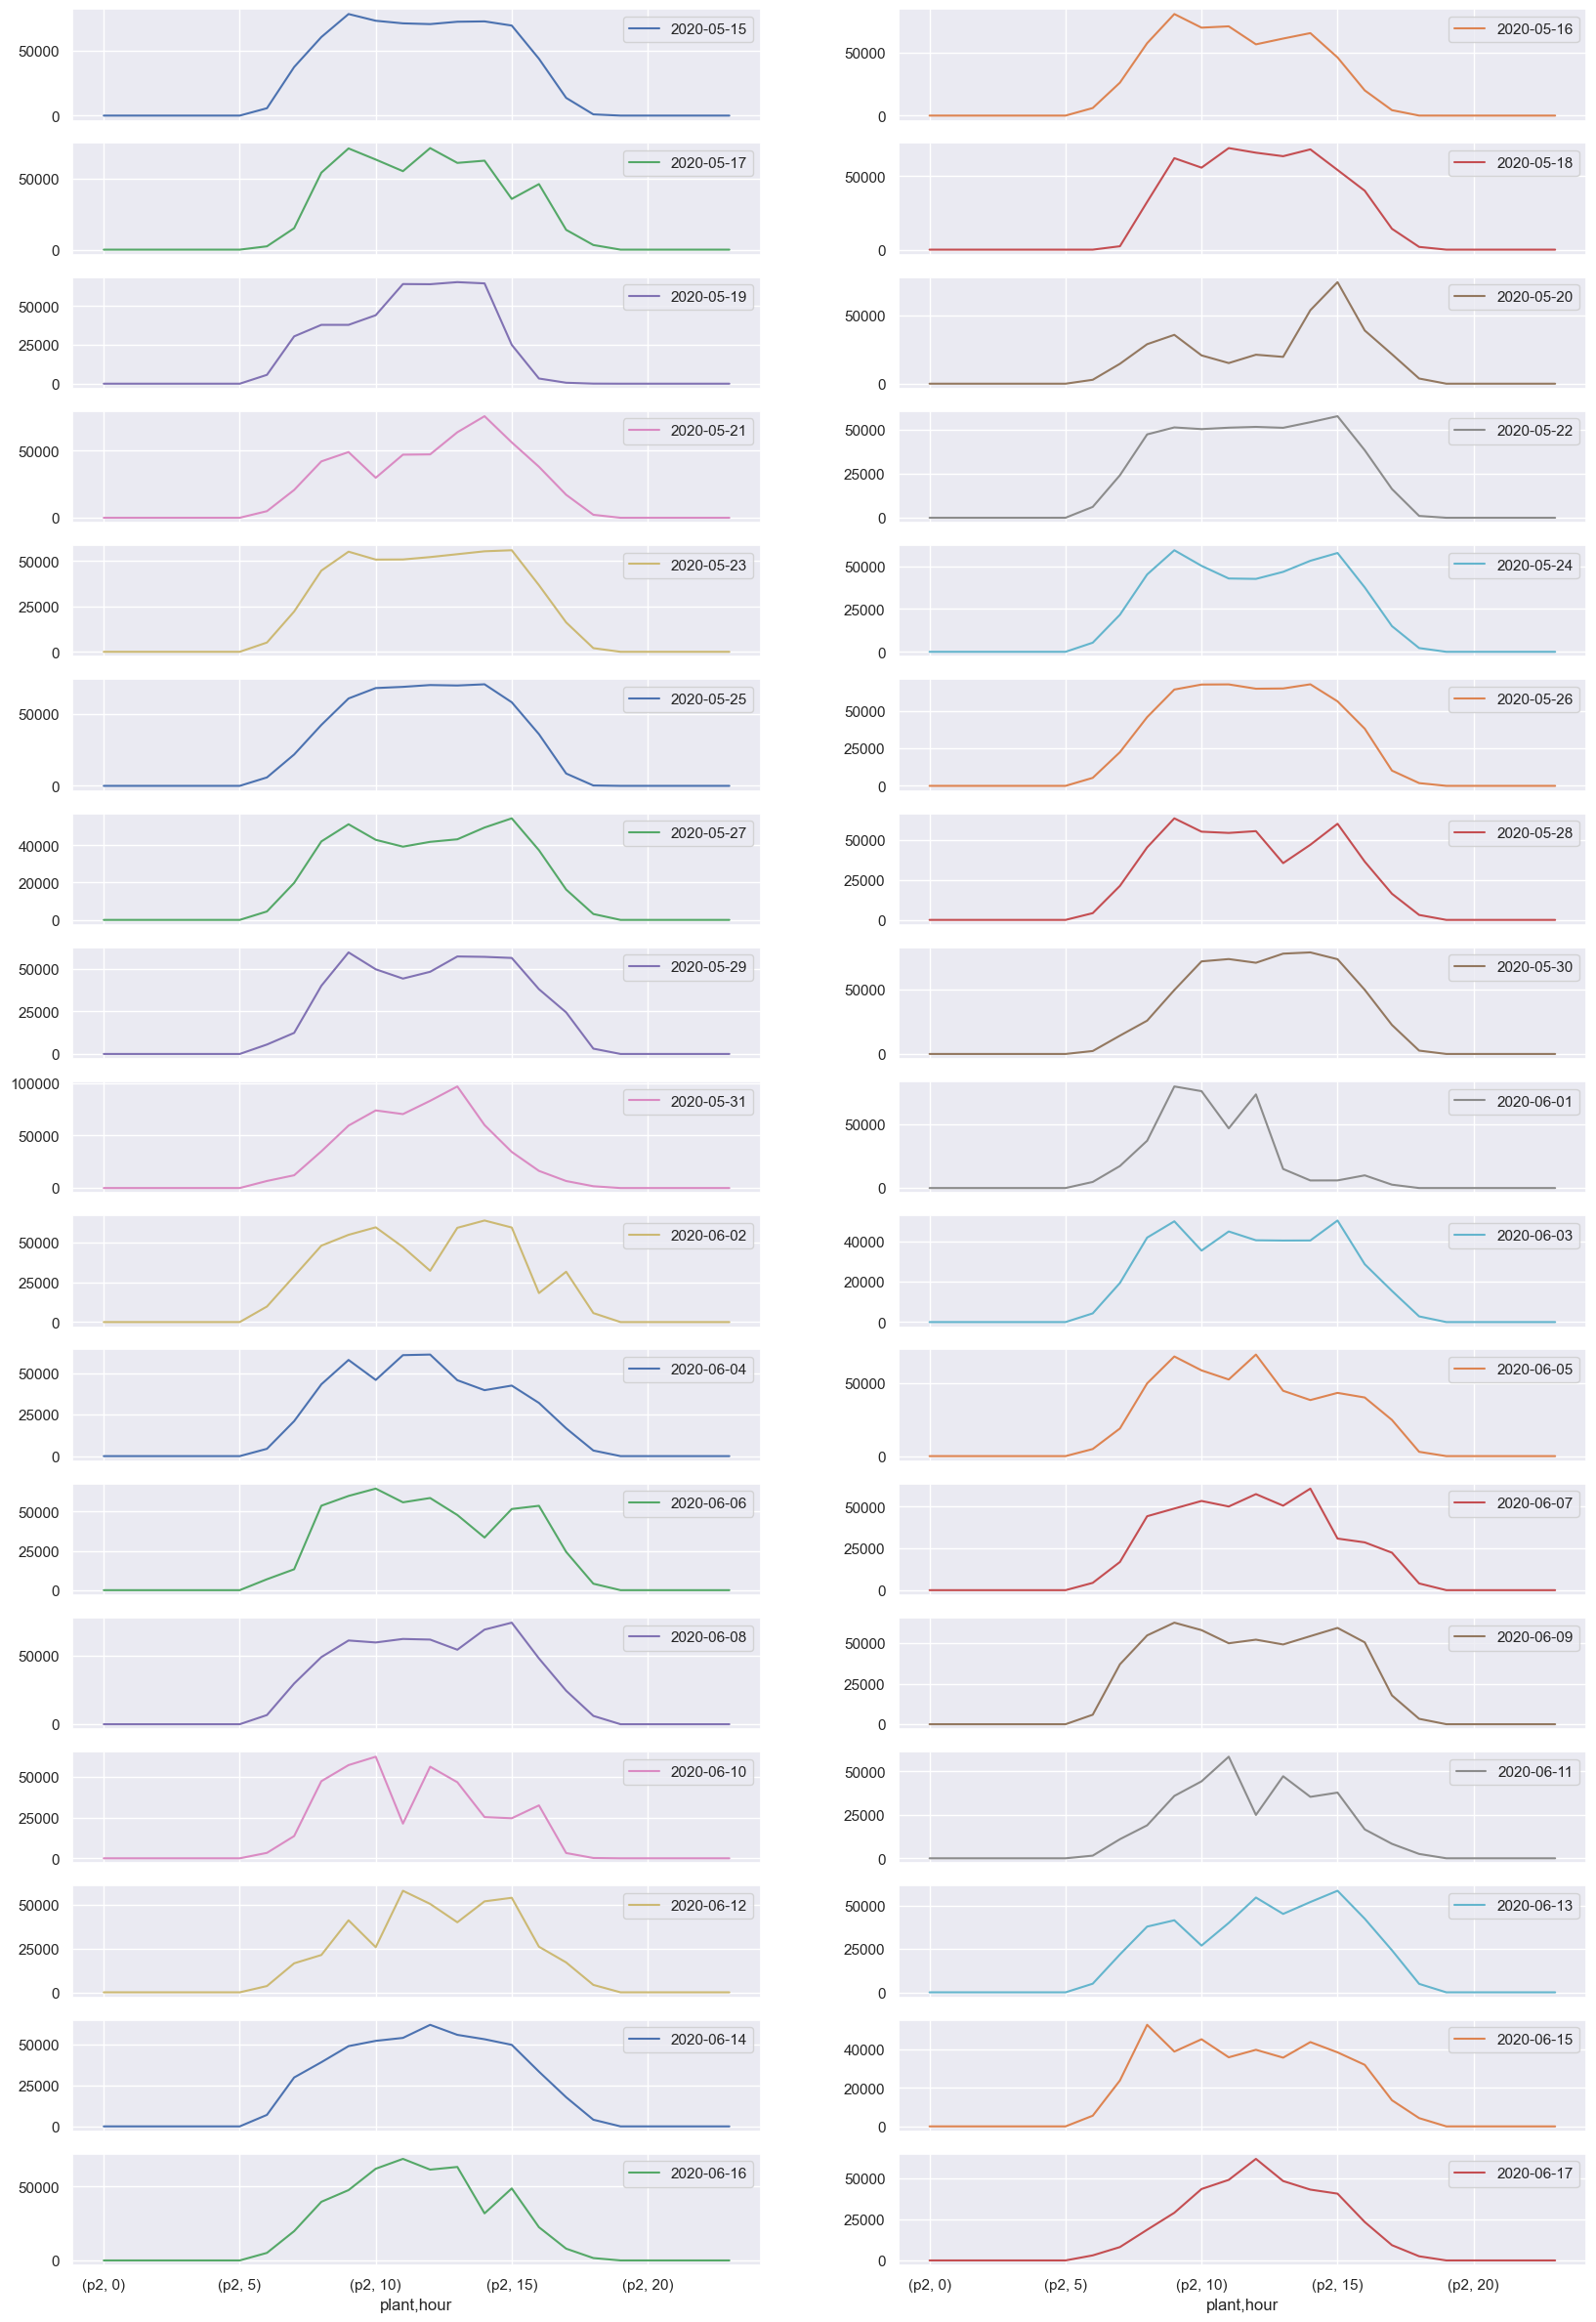

In [27]:
dc_constant_p2.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusions:

* Once again, May 20 shows unusual behavior.
* Production levels are constant throughout the day, but always about 10 times lower than the levels at plant 1.

**INSIGHT:** The low levels at plant 2 are constant and show daily curves that appear normal.

### Is the conversion from DC to AC generated correctly?

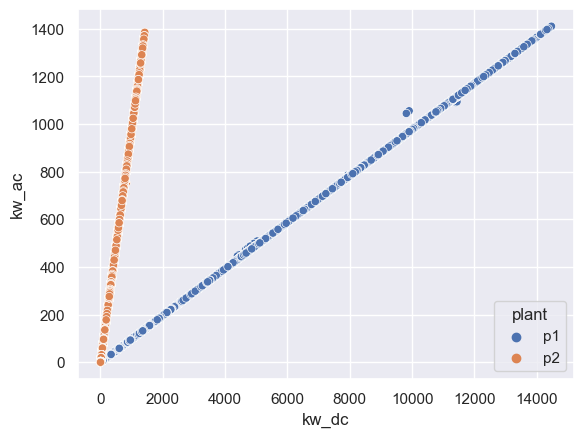

In [28]:
sns.scatterplot(data = df, x = df.kw_dc, y = df.kw_ac, hue = df.plant);

In [29]:
temp = df.groupby(['plant','hour'],as_index = False).efficiency.mean()
temp

plant  hour      efficiency
0     p1     0            0.00
1     p1     1            0.00
2     p1     2            0.00
3     p1     3            0.00
4     p1     4            0.00
5     p1     5            0.00
6     p1     6            9.20
7     p1     7            9.80
8     p1     8            9.81
9     p1     9            9.78
10    p1    10            9.77
11    p1    11            9.75
12    p1    12            9.71
13    p1    13            9.68
14    p1    14            9.76
15    p1    15            9.79
16    p1    16            9.81
17    p1    17            9.76
18    p1    18            6.53
19    p1    19            0.00
20    p1    20            0.00
21    p1    21            0.00
22    p1    22            0.00
23    p1    23            0.00
24    p2     0            0.00
25    p2     1            0.00
26    p2     2            0.00
27    p2     3            0.00
28    p2     4            0.00
29    p2     5            0.58
30    p2     6           92.93
31    p2     7           97.39
32    p2     8           97.42
33    p2     9           91.70
34    p2    10           76.20
35    p2    11           68.35
36    p2    12           68.16
37    p2    13           73.04
38    p2    14           83.43
39    p2    15           95.69
40    p2    16           95.85
41    p2    17           95.56
42    p2    18           73.52
43    p2    19            0.00
44    p2    20            0.00
45    p2    21            0.00
46    p2    22            0.00
47    p2    23            0.00

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

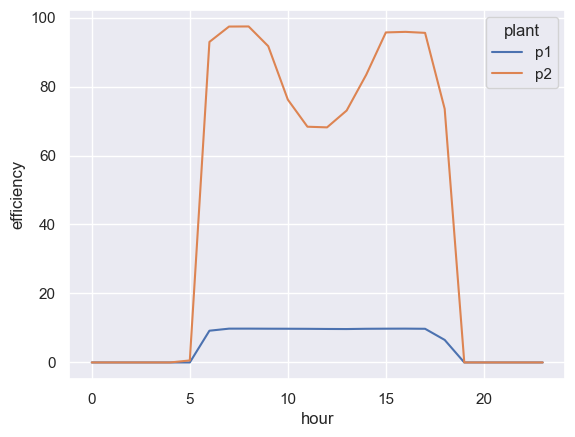

In [30]:
sns.lineplot(data = temp, x = 'hour', y = 'efficiency', hue = 'plant');

**INSIGHT:** Plant 1 has a very low capacity to convert DC to AC, which suggests problems with the inverters.

Other conclusions:

* Look into the inverters on plant 1 in detail to see if they are all skewing the average or if it is just some of them.
* Check why plant 2 loses efficiency during the hours of highest irradiation.

Let's start with the second one, comparing DC production with AC production on plant 2.

In [31]:
temp = df[['plant','hour','kw_dc','kw_ac']].melt(id_vars= ['plant','hour'])
temp

plant  hour variable           value
0         p1     0    kw_dc            0.00
1         p1     0    kw_dc            0.00
2         p1     0    kw_dc            0.00
3         p1     0    kw_dc            0.00
4         p1     0    kw_dc            0.00
...      ...   ...      ...             ...
272939    p2    23    kw_ac            0.00
272940    p2    23    kw_ac            0.00
272941    p2    23    kw_ac            0.00
272942    p2    23    kw_ac            0.00
272943    p2    23    kw_ac            0.00

[272944 rows x 4 columns]

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

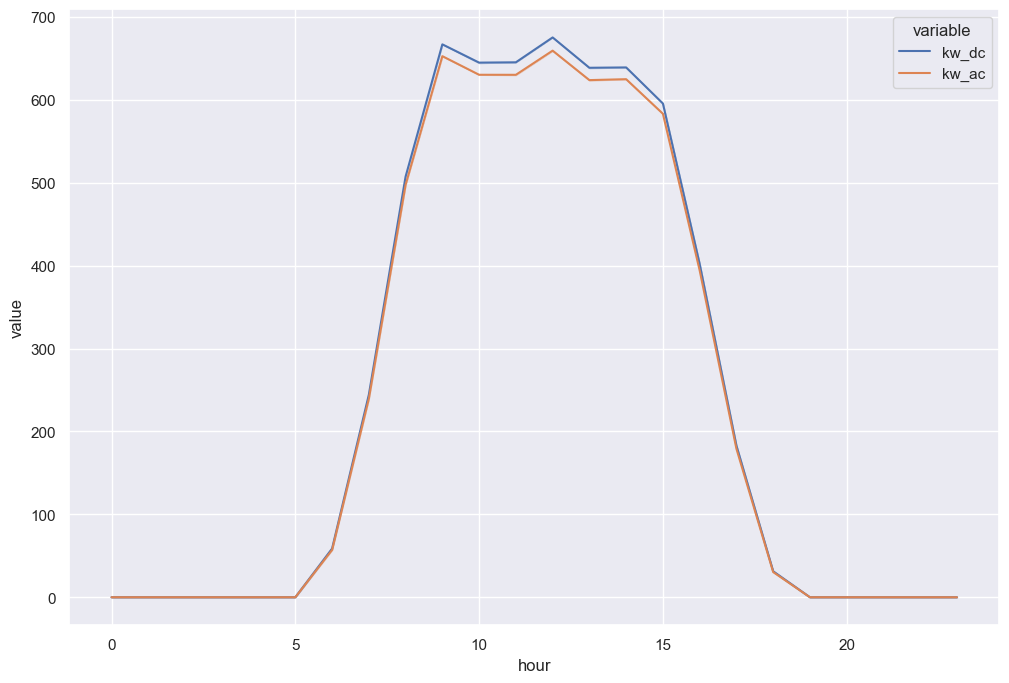

In [32]:
plt.figure(figsize = (12,8))
sns.lineplot(data = temp[temp.plant == 'p2'], x = 'hour', y = 'value', hue = 'variable', errorbar=('ci', False));

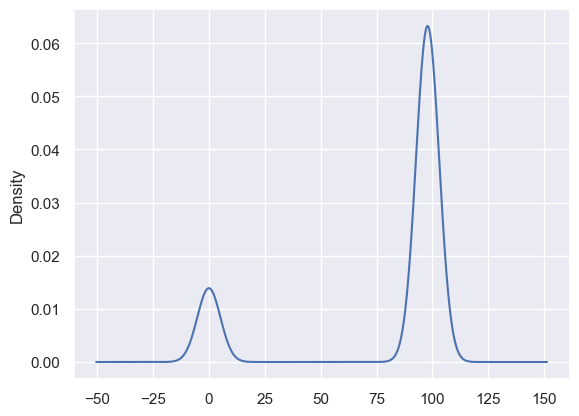

In [33]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.plant == 'p2']
temp.efficiency.plot.density();

In [34]:
temp[temp.kw_dc == 0]

plant  month  day  hour  minute        sensor_id  \
date                                                                   
2020-05-15 09:45:00    p2      5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00    p2      5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00    p2      5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00    p2      5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 10:00:00    p2      5   15    10       0  iq8k7ZNt4Mwm3w0   
...                   ...    ...  ...   ...     ...              ...   
2020-06-16 14:30:00    p2      6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00    p2      6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00    p2      6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00    p2      6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00    p2      6   16    14      30  iq8k7ZNt4Mwm3w0   

                        irradiation       t_ambient        t_module  \
date                                                                  
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 10:00:00            0.83           31.89           46.13   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   

                         inverter_id           kw_dc           kw_ac  \
date                                                                   
2020-05-15 09:45:00  81aHJ1q11NBPMrL            0.00            0.00   
2020-05-15 09:45:00  Et9kgGMDl729KT4            0.00            0.00   
2020-05-15 09:45:00  Quc1TzYxW2pYoWX            0.00            0.00   
2020-05-15 09:45:00  xoJJ8DcxJEcupym            0.00            0.00   
2020-05-15 10:00:00  81aHJ1q11NBPMrL            0.00            0.00   
...                              ...             ...             ...   
2020-06-16 14:30:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-16 14:30:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-16 14:30:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-16 14:30:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-16 14:30:00  xoJJ8DcxJEcupym            0.00            0.00   

                         efficiency          kw_day        kw_total  \
date                                                                  
2020-05-15 09:45:00            0.00         1645.00   1215280381.00   
2020-05-15 09:45:00            0.00         1541.00      1705791.00   
2020-05-15 09:45:00            0.00         1324.00    329510409.00   
2020-05-15 09:45:00            0.00         1735.00    209145328.00   
2020-05-15 10:00:00            0.00         1645.00   1215280381.00   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.00            0.00        34379.33   
2020-06-16 14:30:00            0.00            0.00      8075096.33   
2020-06-16 14:30:00            0.00            0.00       173022.79   
2020-06-16 14:30:00            0.00            0.00      7126074.93   
2020-06-16 14:30:00            0.00            0.00     13955359.33   

                    year_month_day  
date                                
2020-05-15 09:45:00     2020-05-15  
2020-05-15 09:45:00     2020-05-15  
2020-05-15 09:45:00     2020-05-15  
2020-05-15 09:45:00     2020-05-15  
2020-05-15 10:00:00     2020-05-15  
...                            ...  
20

It seems that it is not a problem with the inverter, but rather that no DC has been generated at that moment.

Let's set the condition that DC > 0 and see what the efficiency is there.

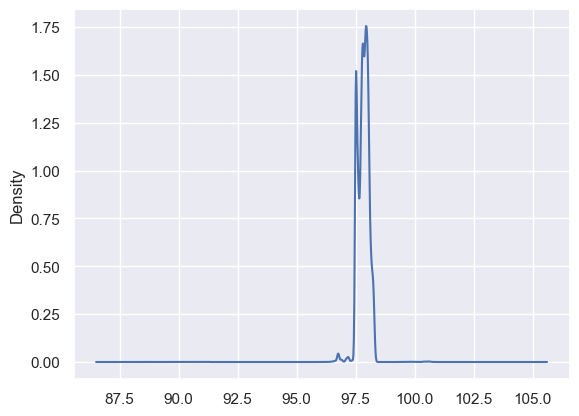

In [35]:
temp[temp.kw_dc > 0].efficiency.plot.density();

Indeed, when DC is used, efficiency exceeds 96%.

The question then is, why isn't DC used? Is there a pattern?

In [36]:
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

plant  month  day  hour  minute        sensor_id  \
date                                                                   
2020-05-15 08:00:00    p2      5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00    p2      5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00    p2      5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00    p2      5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00    p2      5   15     8       0  iq8k7ZNt4Mwm3w0   
...                   ...    ...  ...   ...     ...              ...   
2020-06-17 15:00:00    p2      6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00    p2      6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00    p2      6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00    p2      6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00    p2      6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiation       t_ambient        t_module  \
date                                                                  
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
date                                                                   
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         efficiency          kw_day        kw_total  \
date                                                                  
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                    year_month_day  kw_dc_cero  
date                                            
2020-05-15 08:00:00     2020-05-15           0  
2020-05-15 08:00:00     2020-05-15           0  
2020-05-15 08:00:00     2020-05-15           0  
2020-05-15 08:00:00     2020-05-15           0  
2020

In [37]:
temp.groupby('kw_dc_cero')[['irradiation','t_ambient','t_module']].mean()

irradiation       t_ambient        t_module
kw_dc_cero                                                
0                     0.59           30.48           44.32
1                     0.80           32.48           52.03

There is not much difference in ambient temperature, but there is a difference in module temperature and irradiation.

Could it be that if the module gets too hot, it stops generating DC?

Let's see by comparing the module temperature with DC generation.

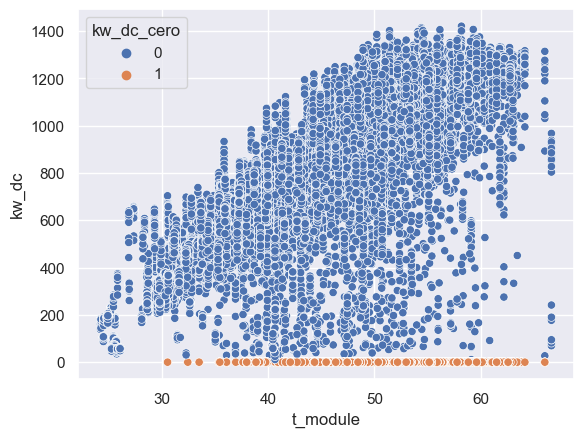

In [38]:
sns.scatterplot(data = temp, x = 't_module', y = 'kw_dc',hue = 'kw_dc_cero');

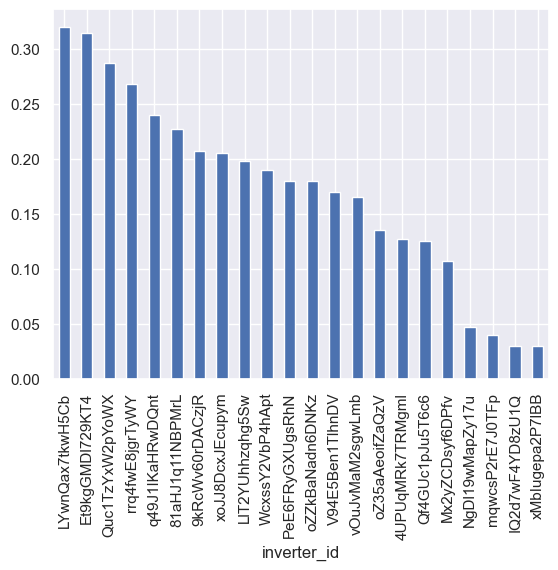

In [39]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

**INSIGHT:** On the second floor, there are several inverters that are not receiving sufficient DC output, and therefore their modules need to be checked.

Let's analyze inverters from the point of view of average efficiency to see if there are “good and bad” ones.

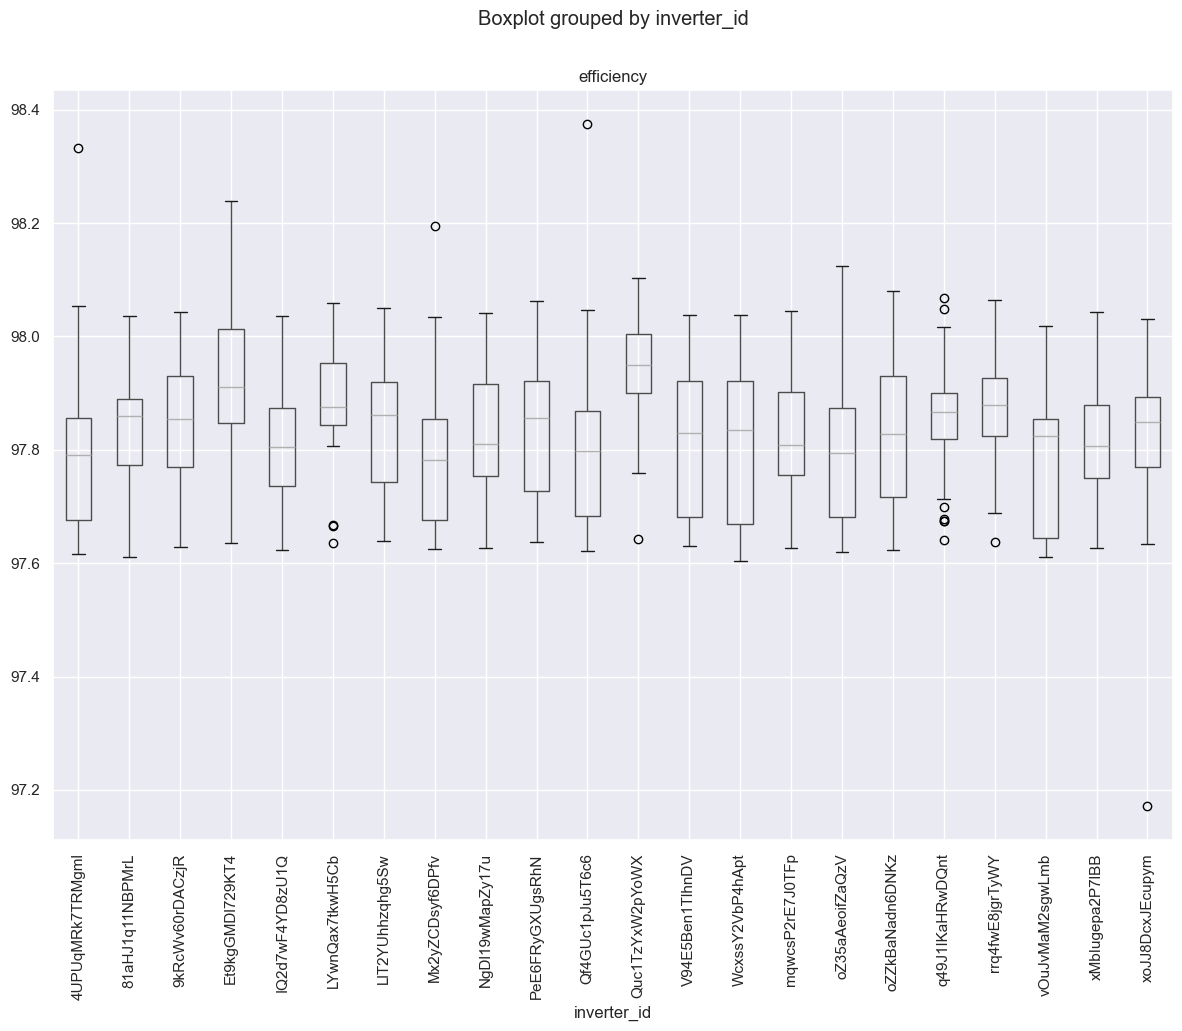

In [41]:
temp[temp.kw_dc > 0].groupby(['inverter_id','year_month_day'],as_index = False).efficiency.mean().boxplot(column = 'efficiency', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

**INSIGHT:** Once the problem of DC non-generation is discounted, the inverters in plant 2 do work well and perform the AC conversion task effectively.

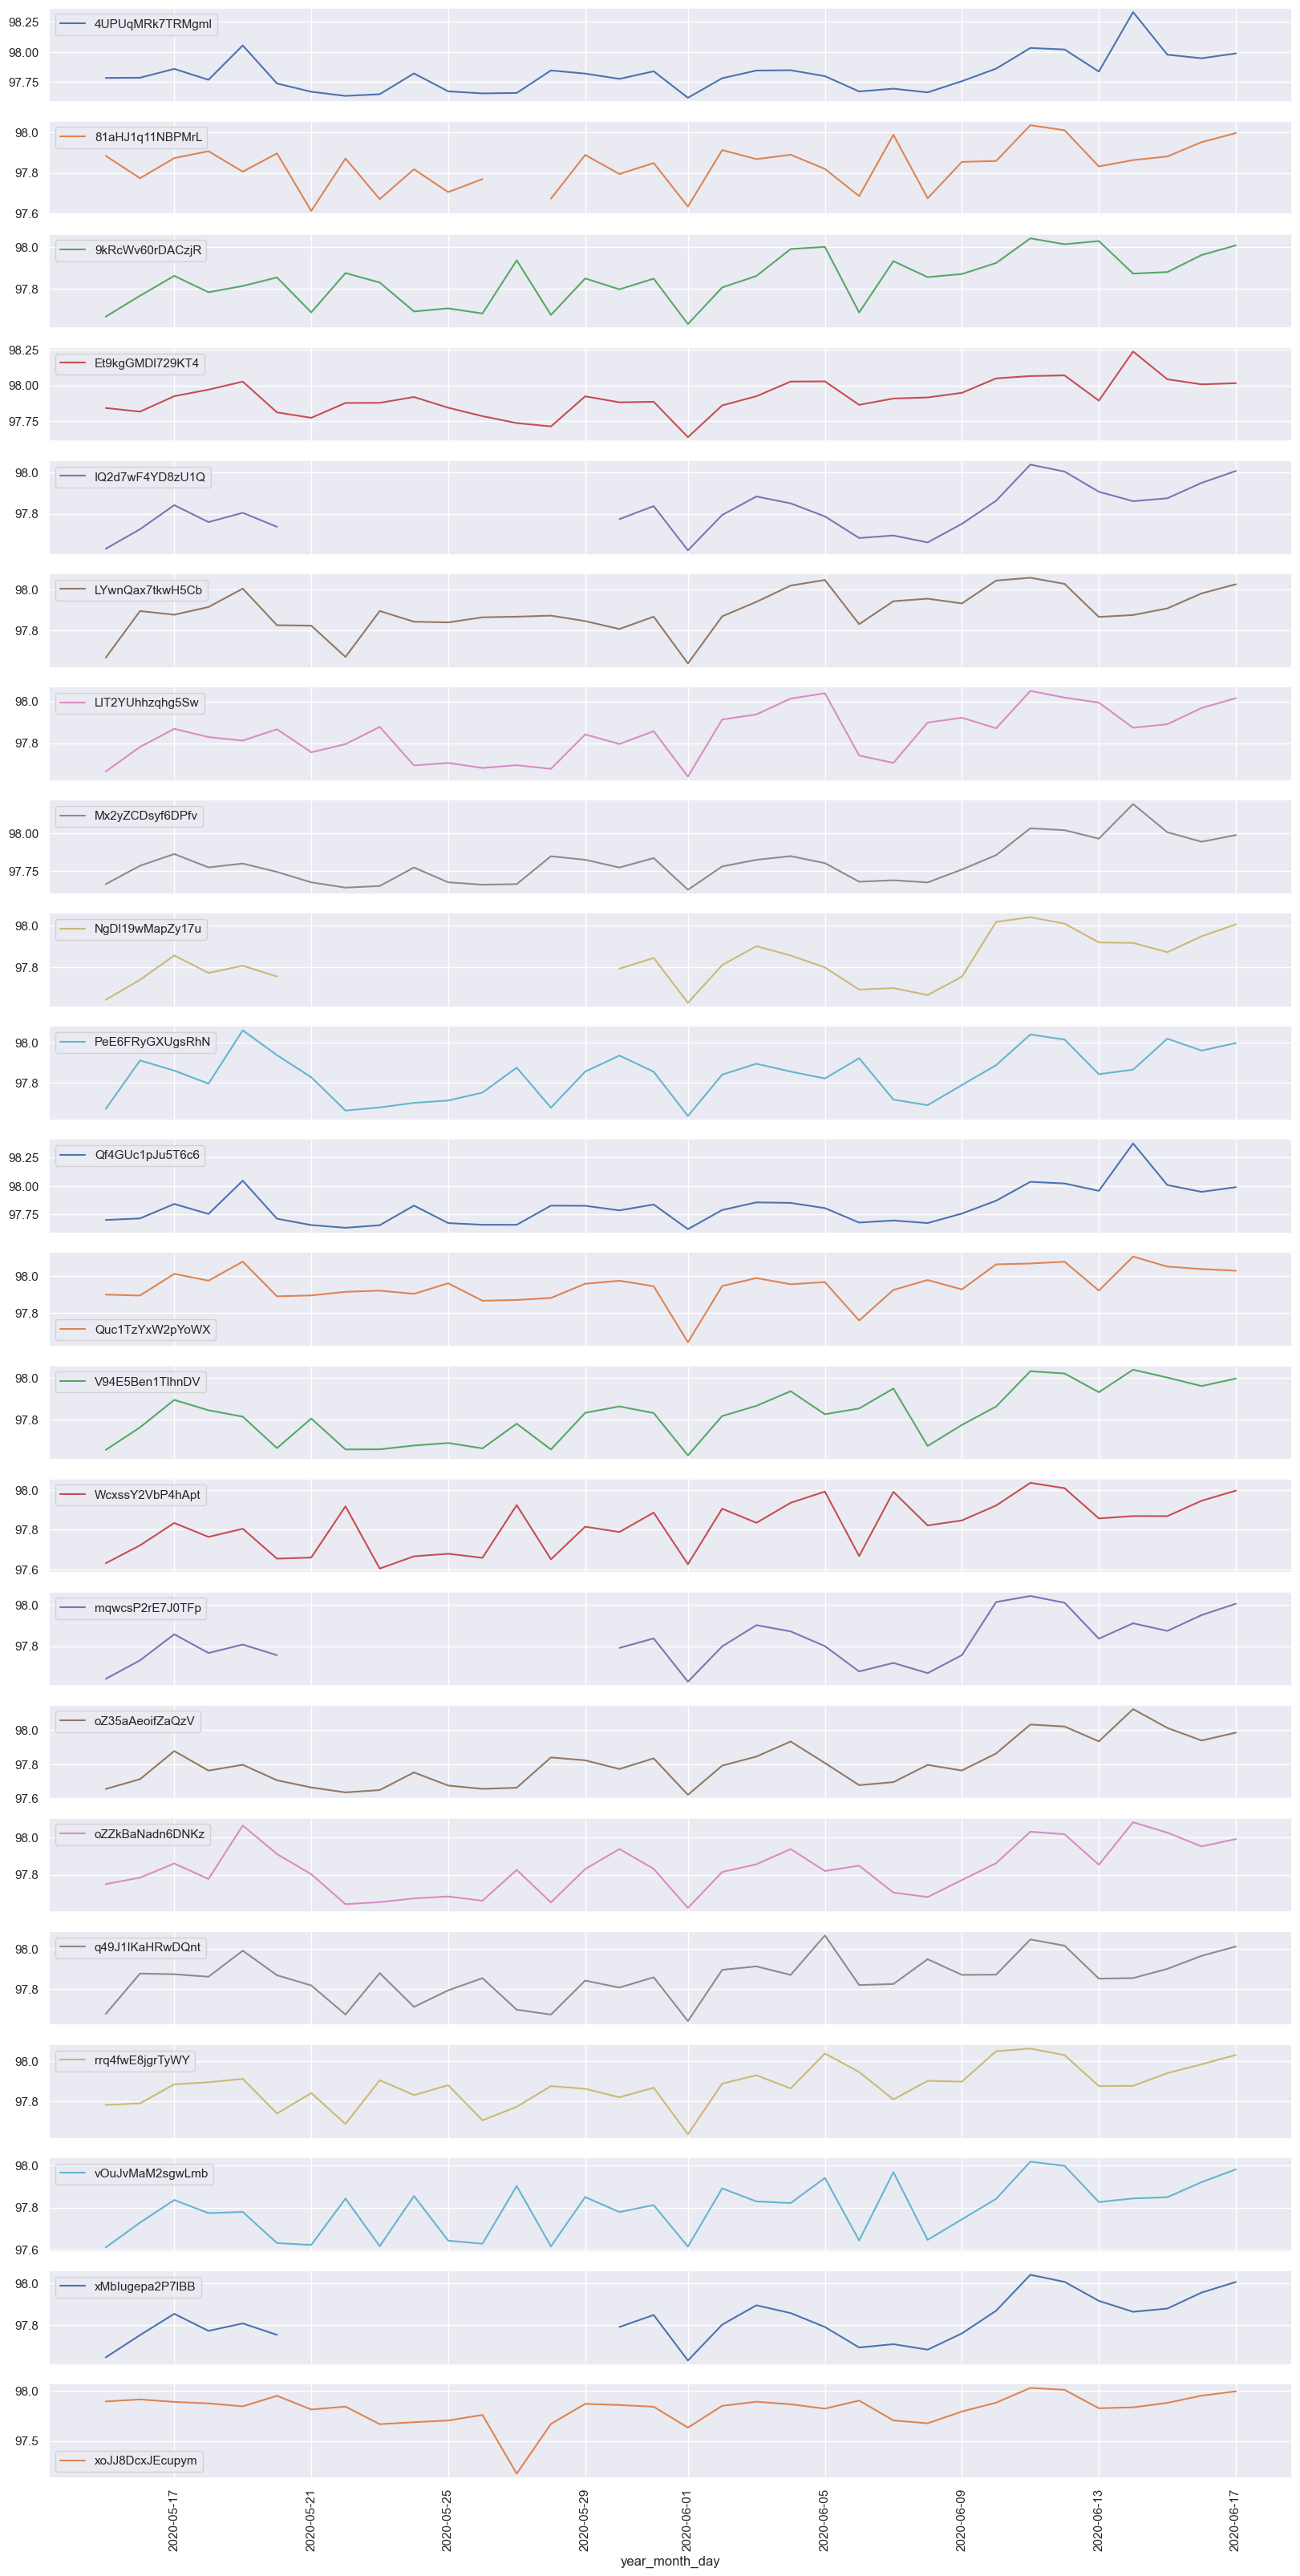

In [42]:
temp[temp.kw_dc > 0].groupby(['inverter_id','year_month_day']).efficiency.mean().unstack(level = 0).plot(subplots = True, sharex=True, figsize=(20,40))
plt.xticks(rotation = 90);

In [43]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.plant == 'p1']
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

plant  month  day  hour  minute        sensor_id  \
date                                                                   
2020-05-15 08:00:00    p1      5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00    p1      5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00    p1      5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00    p1      5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00    p1      5   15     8       0  HmiyD2TTLFNqkNe   
...                   ...    ...  ...   ...     ...              ...   
2020-06-17 15:00:00    p1      6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00    p1      6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00    p1      6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00    p1      6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00    p1      6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiation       t_ambient        t_module  \
date                                                                  
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   

                         inverter_id           kw_dc           kw_ac  \
date                                                                   
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         efficiency          kw_day        kw_total  \
date                                                                  
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                    year_month_day  kw_dc_cero  
date                                            
2020-05-15 08:00:00     2020-05-15           0  
2020-05-15 08:00:00     2020-05-15           0  
2020-05-15 08:00:00     2020-05-15           0  
2020-05-15 08:00:00     2020-05-15           0  
2020

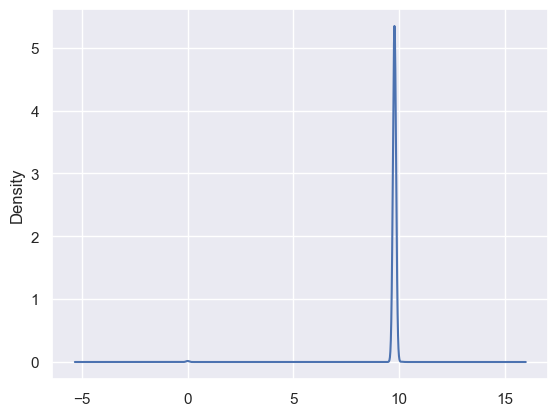

In [44]:
temp.efficiency.plot.density();

All the inverters in plant 1 have a constant efficiency.

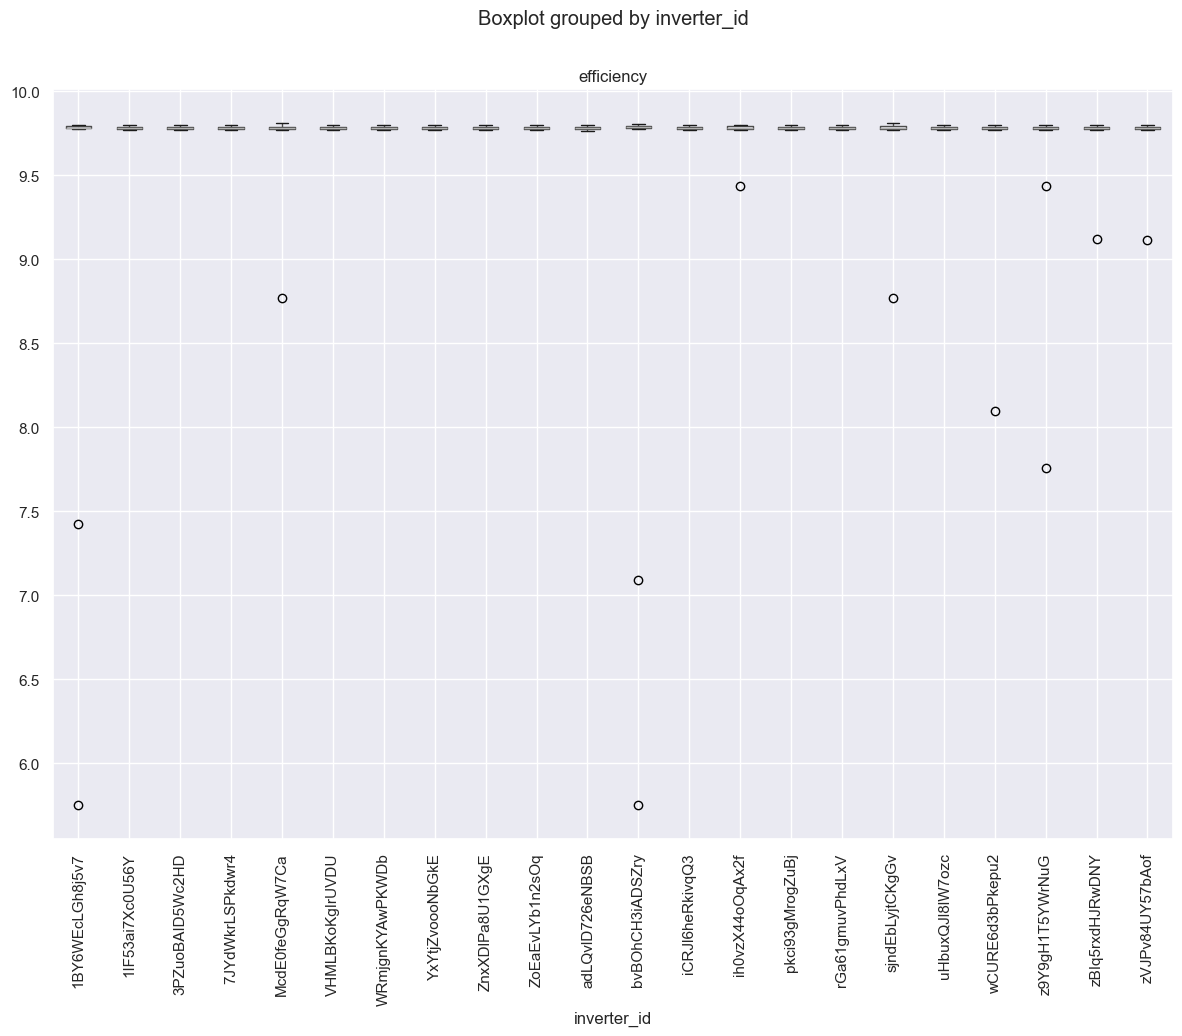

In [45]:
temp.groupby(['inverter_id','year_month_day'],as_index = False).efficiency.mean().boxplot(column = 'efficiency', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

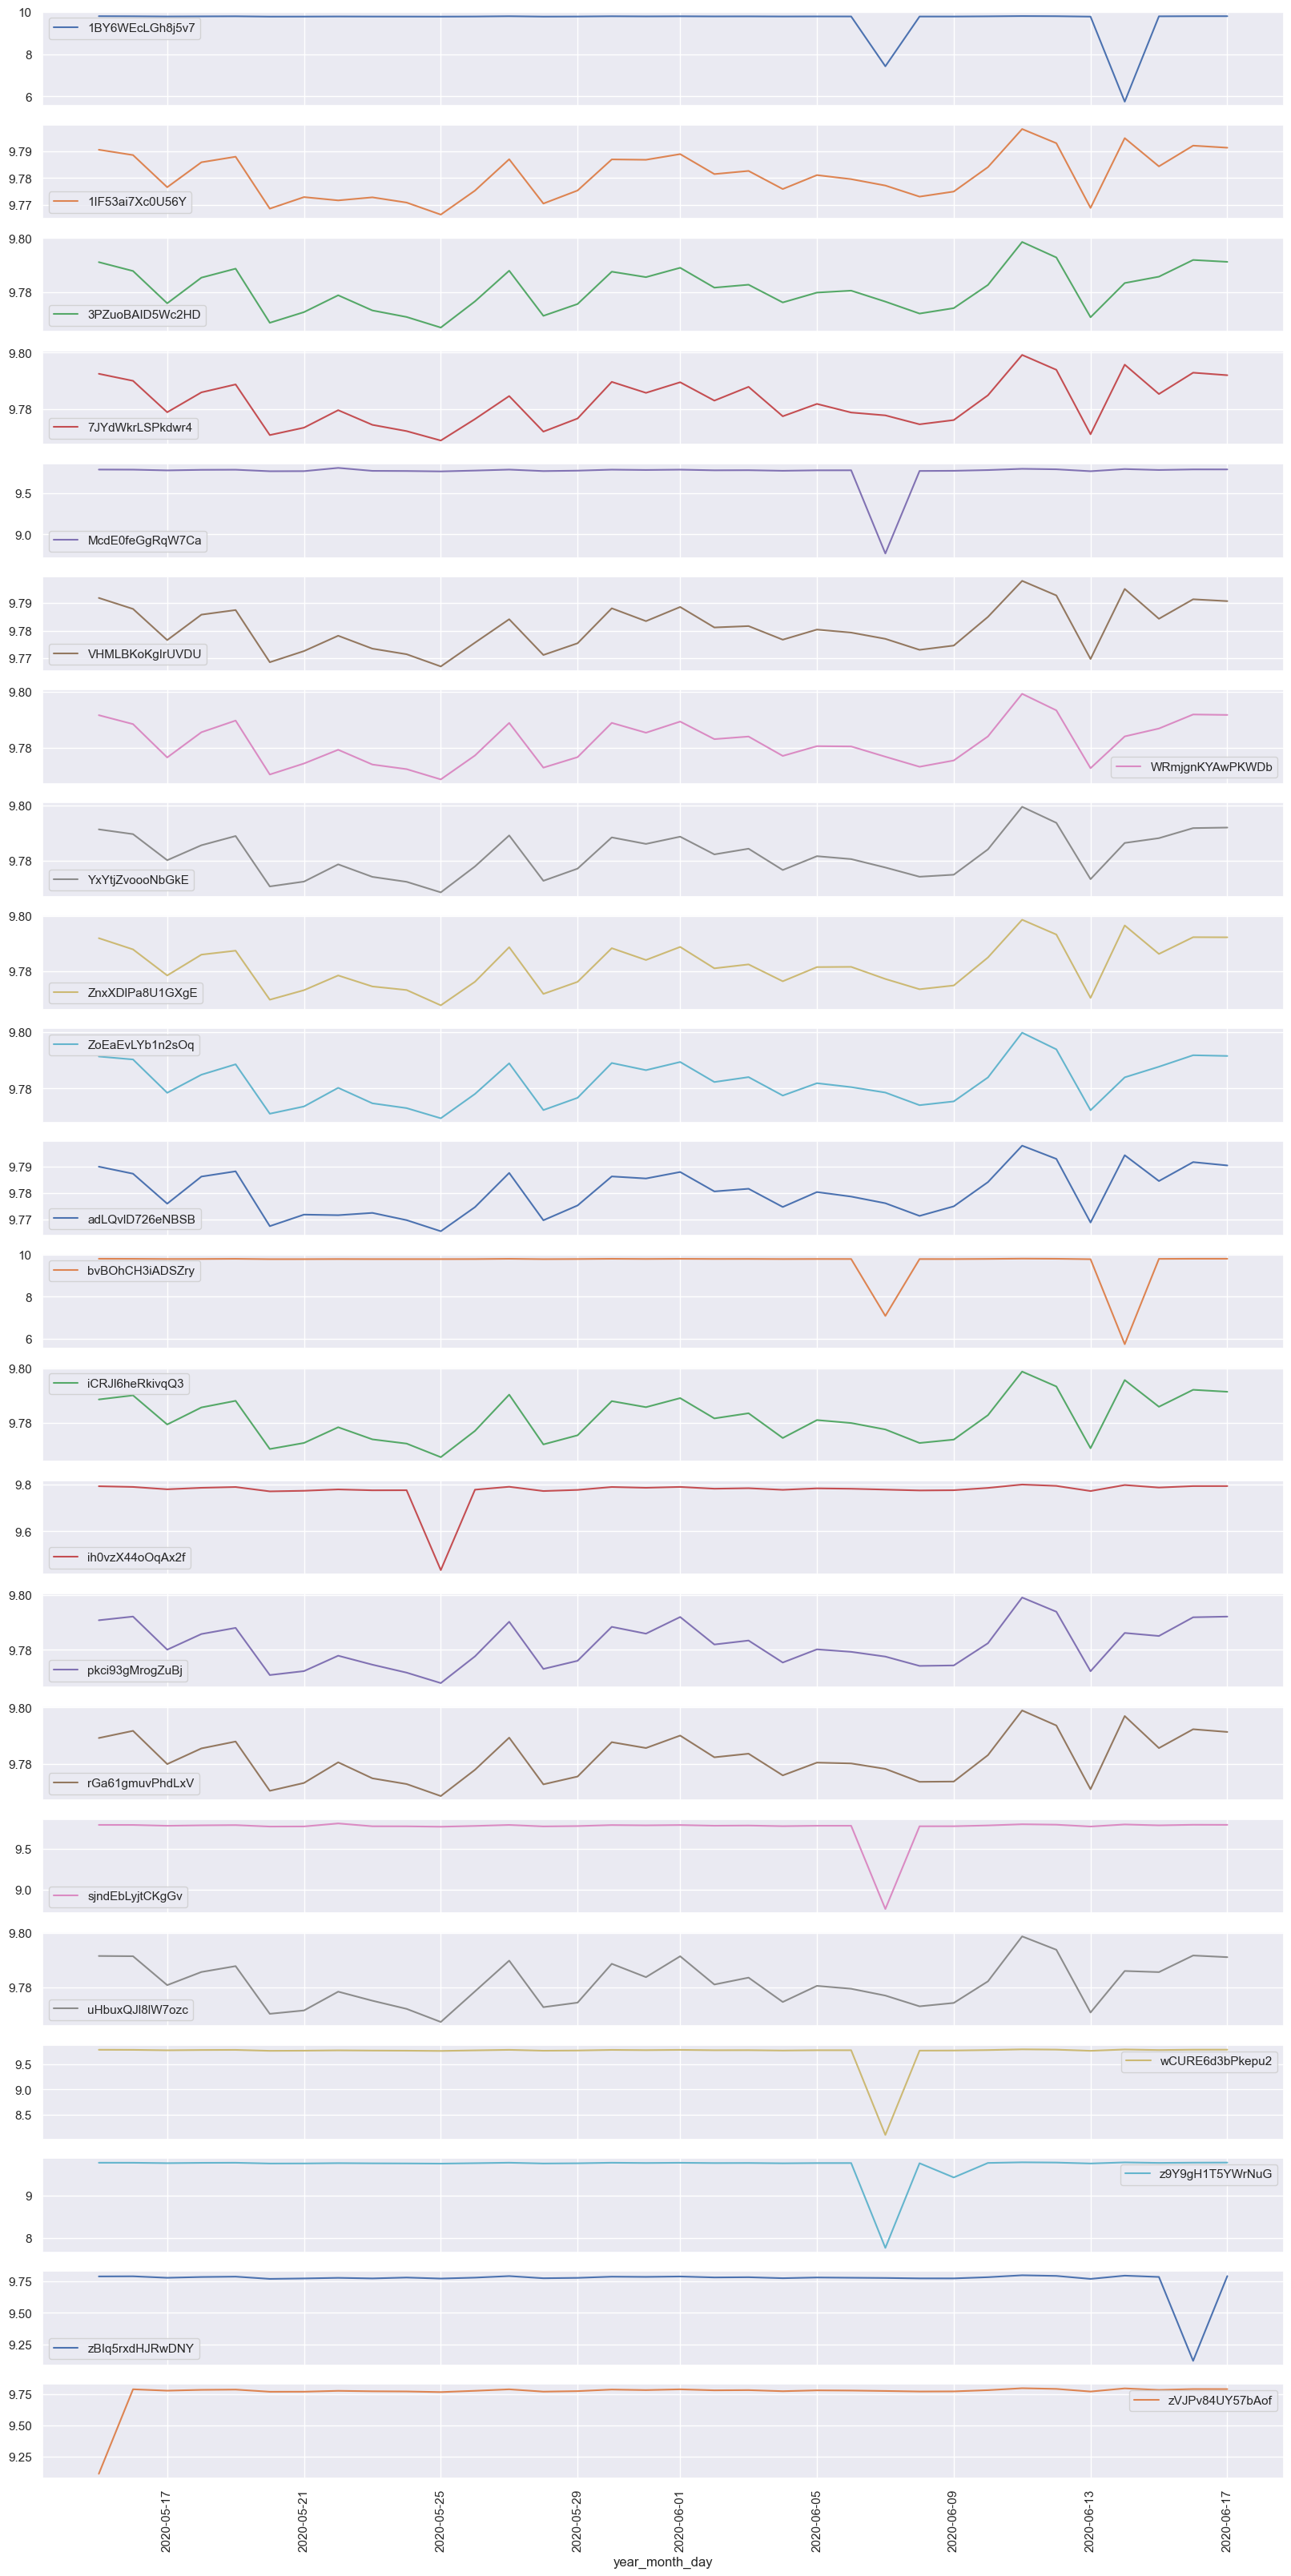

In [46]:
temp.groupby(['inverter_id','year_month_day']).efficiency.mean().unstack(level = 0).plot(subplots = True, sharex=True, figsize=(20,40))
plt.xticks(rotation = 90);

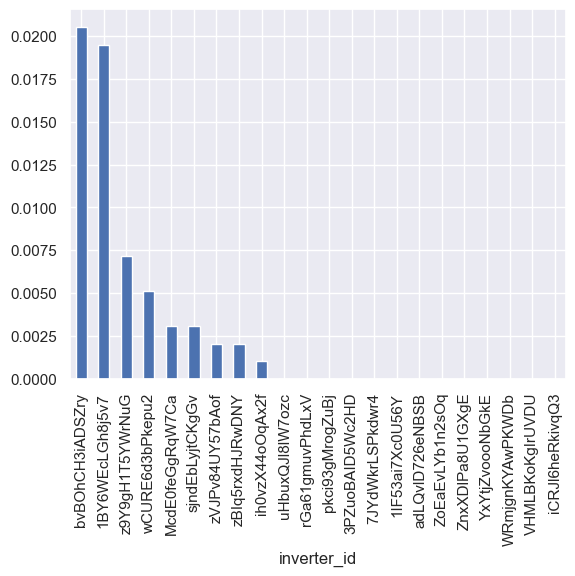

In [47]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

We see that although some inverters have had faults, their magnitude is less than 2% of the measurements.

Therefore, DC generation in plant 1 is correct, and the fault lies in the conversion from DC to AC.

# Conclusions

After analyzing the data, we can conclude that:

* There are serious data quality issues. We should check where in the chain these problems are happening, including the plant meters.
* The fact that DC generation is about 10 times higher in plant 1 than in plant 2, added to the fact that efficiency in plant 1 is above 10%, leads us to believe that the DC generation data in plant 1 may be artificially scaled for some reason.
* However, in the absence of verification, we will assume that the data is correct for the time being.
* Both plants have received high amounts of irradiation, and we have not identified any problems at this stage.
* Although the ambient temperature is higher in plant 2 and its modules heat up more than those in plant 1, this does not seem to have a significant impact.
* DC generation in plant 1 is working well, and the modules appear to be feeding DC to the inverters.
* DC generation in plant 2 is NOT working well; some modules are sending very little DC to the inverters, even during peak irradiation hours.
* The DC to AC transformation in plant 1 is NOT working well, only around 10% is transformed, albeit consistently. This low efficiency is not due to moments when DC is not being received, nor is it concentrated in specific inverters, but rather seems to be more structural (again, bear in mind that this could be due to a data quality problem in kw_dc in plant 1).
* The DC to AC conversion in plant 2 works well, since once the periods of zero DC generation are eliminated, the rest have an efficiency of over 97%.

Recommendations:

* Review data collection and its reliability.
* Maintenance review of the inverter modules in plant 2, where there are many periods of zero DC generation.
* Maintenance review of the inverters in Plant 1.